In [1]:
# Object Detecion 
import cv2
from ultralytics import YOLO
#plots
import matplotlib.pyplot as plt
import seaborn as sns

#basics
import pandas as pd
import numpy as np
import os
import subprocess

from tqdm import tqdm

cam1_path = '/hy-tmp/七贤岭/417290'
cam2_path = '/hy-tmp/七贤岭/417334'
cam1_size = len(os.listdir(cam1_path))
vid_name = os.listdir(cam1_path)[cam1_size // 2]
path = os.path.join(cam1_path, vid_name)

print(path)

/hy-tmp/七贤岭/417290/qx290_231208_100613_100714.mp4


In [2]:
vid1_date = vid_name.split('_')[1]
vid1_time_start = vid_name.split('_')[2][:-2]
vid1_time_start_hour = int(vid1_time_start[:2])
vid1_time_start_minute = vid1_time_start_hour*60 + int(vid1_time_start[2:])

vid1_time_end = vid_name.split('_')[3][:-4][:-2]
vid1_time_end_hour = int(vid1_time_end[:2])
vid1_time_end_minute = vid1_time_end_hour*60 + int(vid1_time_end[2:])

print(vid1_date)
print(vid1_time_start_minute, vid1_time_end_minute)

231208
606 607


In [3]:
timelapse = 5 # +-5min
vid2_date = vid1_date
vid2_time_start = vid1_time_start_minute - timelapse
vid2_time_end = vid1_time_end_minute + timelapse
print(vid2_time_start, vid2_time_end)

vid2s = []

for vid2 in os.listdir(cam2_path):
    vid2_time = vid2.split('_')[2][:-2]
    vid2_time_hour = int(vid2_time[:2])
    vid2_time_minute = vid2_time_hour*60 + int(vid2_time[2:])
    
    if vid2_time_minute >= vid2_time_start and vid2_time_minute <= vid2_time_end:
        print(vid2)
        vid2s.append(vid2)

601 612
qx334_231208_100147_100248.mp4
qx334_231208_100248_100348.mp4
qx334_231208_100348_100449.mp4
qx334_231208_100449_100549.mp4
qx334_231208_100549_100650.mp4
qx334_231208_100650_100751.mp4
qx334_231208_100751_100851.mp4
qx334_231208_100851_100952.mp4
qx334_231208_100952_101053.mp4
qx334_231208_101053_101153.mp4
qx334_231208_101153_101254.mp4
qx334_231208_101254_101355.mp4


In [4]:
# glue videos together
vid2s = sorted(vid2s)
print(vid2s)


output_path = './temp/'
if not os.path.exists(output_path):
    os.makedirs(output_path)
output_name = os.path.join(output_path, 'merged.mp4')
print(output_name)

['qx334_231208_100147_100248.mp4', 'qx334_231208_100248_100348.mp4', 'qx334_231208_100348_100449.mp4', 'qx334_231208_100449_100549.mp4', 'qx334_231208_100549_100650.mp4', 'qx334_231208_100650_100751.mp4', 'qx334_231208_100751_100851.mp4', 'qx334_231208_100851_100952.mp4', 'qx334_231208_100952_101053.mp4', 'qx334_231208_101053_101153.mp4', 'qx334_231208_101153_101254.mp4', 'qx334_231208_101254_101355.mp4']
./temp/merged.mp4


In [5]:
# use ffmpeg to concat all videos into a single video
with open('temp/vid2.txt', 'w') as f:
    for vid2 in vid2s:
        f.write(f"file '{os.path.join(cam2_path, vid2)}'\n")
cmd = f"ffmpeg -f concat -safe 0 -i temp/vid2.txt -c copy {output_name} -y"

In [6]:
os.system(cmd)

ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --e

0

In [7]:
from ipywidgets import Video

Video.from_file(output_name)

Video(value=b'\x00\x00\x00 ftypisom\x00\x00\x02\x00isomiso2avc1mp41\x00\x00\x00\x08free...')

In [3]:
# Object Detecion 
import cv2
from ultralytics import YOLO
#plots
import matplotlib.pyplot as plt
import seaborn as sns

#basics
import pandas as pd
import numpy as np
import os
import subprocess

from tqdm import tqdm

#loading a YOLO model from disk
model = YOLO('/root/yolov8x.pt')


#geting names from classes
dict_classes = model.model.names

### Configurations
# Scaling percentage of original frame
scale_percent = 100
#-------------------------------------------------------
# Reading video with cv2
output_name = '/root/YOLO-ViT-PGC/temp/merged.mp4'
video = cv2.VideoCapture(output_name)

# Objects to detect Yolo
class_IDS = [0] 
# Auxiliary variables
centers_old = {}


# Original informations of video
height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
fps = video.get(cv2.CAP_PROP_FPS)
print('[INFO] - Original Dim: ', (width, height))

# Scaling Video for better performance 
if scale_percent != 100:
    print('[INFO] - Scaling change may cause errors in pixels lines ')
    width = int(width * scale_percent / 100)
    height = int(height * scale_percent / 100)
    print('[INFO] - Dim Scaled: ', (width, height))

[INFO] - Original Dim:  (1920, 1080)


[aac @ 0x556ef298c6c0] TNS filter order 19 is greater than maximum 12.


In [4]:
from torchreid.reid.utils import FeatureExtractor

extractor = FeatureExtractor(
    model_name='osnet_x1_0',
    model_path='/root/osnet_x1_0_imagenet.pth',
    device='cuda'
)

Model: osnet_x1_0
- params: 2,193,616
- flops: 978,878,352
Successfully loaded pretrained weights from "/root/osnet_x1_0_imagenet.pth"
** The following layers are discarded due to unmatched keys or layer size: ['classifier.weight', 'classifier.bias']


In [10]:
# vector search
import faiss
index = faiss.IndexFlatL2(512)


0: 384x640 1 person, 17.7ms
Speed: 2.8ms preprocess, 17.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


tensor([[1317.1550,  710.5646,  293.0665,  656.5418]], device='cuda:0')


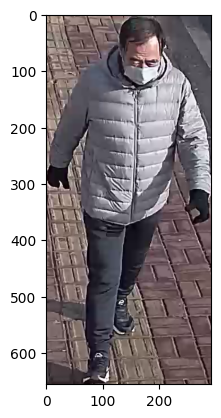

torch.Size([1, 512])

0: 384x640 (no detections), 14.9ms
Speed: 3.0ms preprocess, 14.9ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)
tensor([], device='cuda:0', size=(0, 4))

0: 384x640 (no detections), 14.5ms
Speed: 2.5ms preprocess, 14.5ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)
tensor([], device='cuda:0', size=(0, 4))

0: 384x640 (no detections), 16.6ms
Speed: 5.1ms preprocess, 16.6ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)
tensor([], device='cuda:0', size=(0, 4))

0: 384x640 (no detections), 16.8ms
Speed: 3.8ms preprocess, 16.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)
tensor([], device='cuda:0', size=(0, 4))

0: 384x640 1 person, 13.1ms
Speed: 3.6ms preprocess, 13.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)
tensor([[1380.3087,  430.8231,  206.4607,  477.4286]], device='cuda:0')


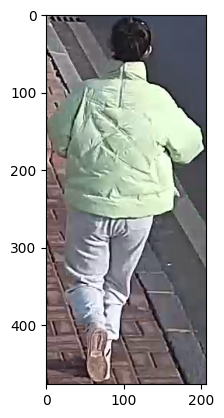

torch.Size([1, 512])

0: 384x640 2 persons, 15.1ms
Speed: 3.2ms preprocess, 15.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)
tensor([[1242.6764,  102.2898,  114.7566,  204.5797],
        [ 350.2141,   74.2180,  103.8538,  148.4359]], device='cuda:0')


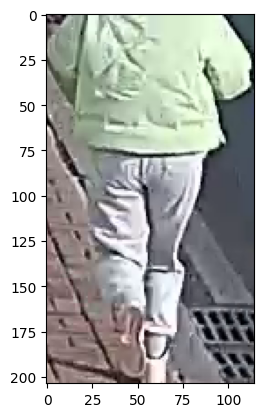

torch.Size([1, 512])


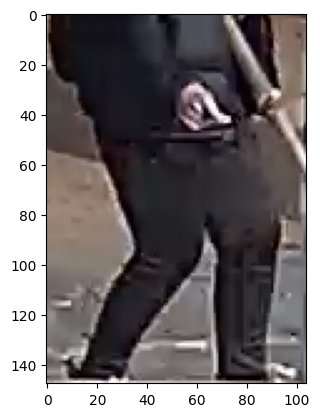

torch.Size([1, 512])

0: 384x640 1 person, 14.0ms
Speed: 2.6ms preprocess, 14.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)
tensor([[694.4728, 144.4772, 111.6094, 288.9545]], device='cuda:0')


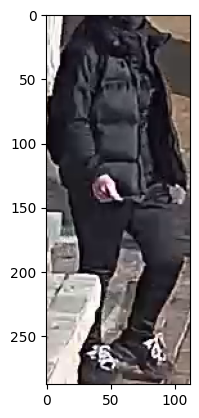

torch.Size([1, 512])

0: 384x640 1 person, 17.5ms
Speed: 3.9ms preprocess, 17.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)
tensor([[907.0140, 274.9045, 153.2391, 398.2191]], device='cuda:0')


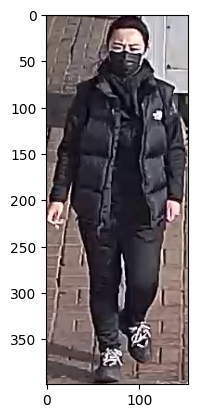

torch.Size([1, 512])

0: 384x640 2 persons, 15.0ms
Speed: 3.3ms preprocess, 15.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)
tensor([[936.6359, 418.7495, 199.1285, 483.0975],
        [944.3410, 133.9757, 105.0813, 229.8523]], device='cuda:0')


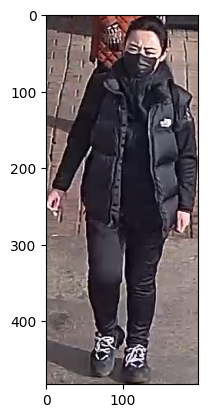

torch.Size([1, 512])


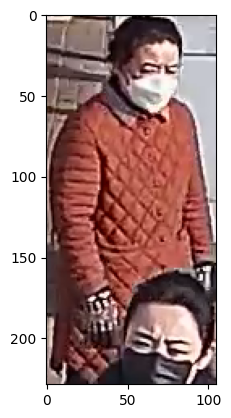

torch.Size([1, 512])

0: 384x640 2 persons, 16.0ms
Speed: 2.8ms preprocess, 16.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)
tensor([[ 808.3879,  708.7794,  243.8169,  645.9114],
        [1145.1508,  319.2613,  150.1770,  407.8178]], device='cuda:0')


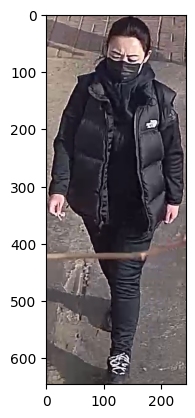

torch.Size([1, 512])


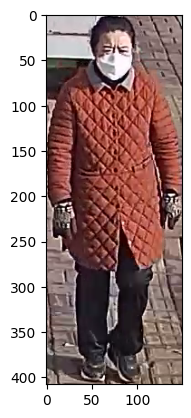

torch.Size([1, 512])

0: 384x640 3 persons, 13.8ms
Speed: 4.8ms preprocess, 13.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)
tensor([[1152.1418,  516.9863,  192.3556,  533.0122],
        [ 451.1592,  939.2587,  327.9893,  272.8107],
        [1443.3191,  734.3826,  306.7306,  675.9056]], device='cuda:0')


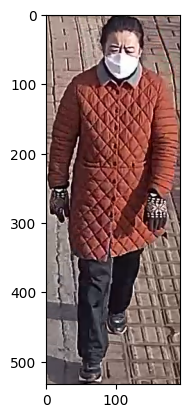

torch.Size([1, 512])


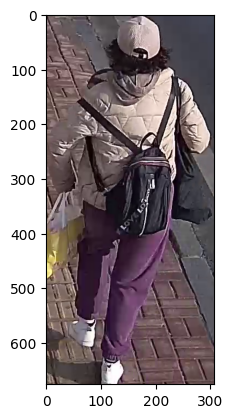

torch.Size([1, 512])

0: 384x640 2 persons, 17.0ms
Speed: 2.7ms preprocess, 17.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)
tensor([[1233.3445,  759.8378,  243.5431,  630.9749],
        [1293.1875,  290.8927,  171.7977,  346.8524]], device='cuda:0')


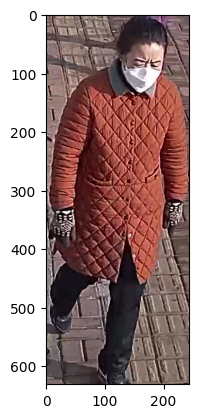

torch.Size([1, 512])


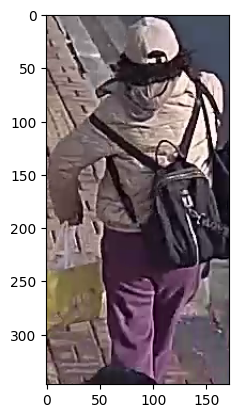

torch.Size([1, 512])

0: 384x640 2 persons, 14.1ms
Speed: 2.8ms preprocess, 14.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)
tensor([[1503.1271,  959.1268,  304.9043,  236.8221],
        [1238.7991,  143.1646,  134.2614,  286.3293]], device='cuda:0')


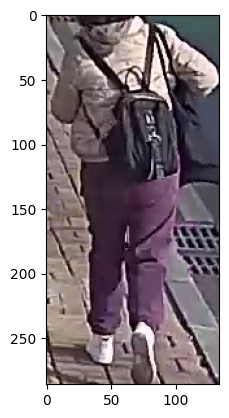

torch.Size([1, 512])

0: 384x640 (no detections), 14.0ms
Speed: 3.3ms preprocess, 14.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)
tensor([], device='cuda:0', size=(0, 4))

0: 384x640 (no detections), 13.3ms
Speed: 2.1ms preprocess, 13.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)
tensor([], device='cuda:0', size=(0, 4))

0: 384x640 (no detections), 14.0ms
Speed: 3.7ms preprocess, 14.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)
tensor([], device='cuda:0', size=(0, 4))

0: 384x640 (no detections), 15.5ms
Speed: 3.8ms preprocess, 15.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)
tensor([], device='cuda:0', size=(0, 4))

0: 384x640 1 person, 15.6ms
Speed: 3.0ms preprocess, 15.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)
tensor([[1181.9998,   89.9656,   63.6036,  179.9312]], device='cuda:0')


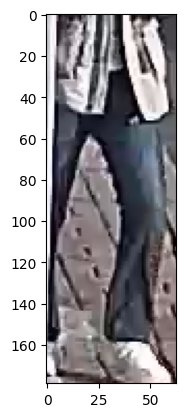

torch.Size([1, 512])

0: 384x640 1 person, 17.1ms
Speed: 2.6ms preprocess, 17.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)
tensor([[1209.9504,  170.6248,  134.1680,  341.2497]], device='cuda:0')


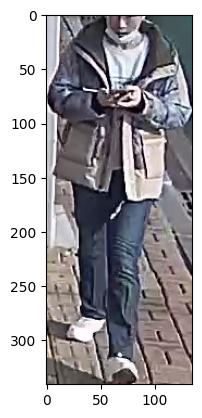

torch.Size([1, 512])

0: 384x640 1 person, 15.0ms
Speed: 2.3ms preprocess, 15.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)
tensor([[1145.1738,  380.6505,  181.4335,  517.4665]], device='cuda:0')


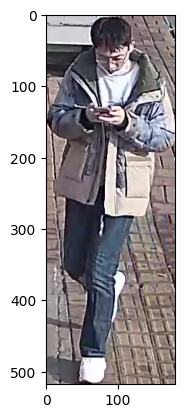

torch.Size([1, 512])

0: 384x640 1 person, 15.4ms
Speed: 3.4ms preprocess, 15.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)
tensor([[941.2748, 638.6675, 250.5828, 685.2410]], device='cuda:0')


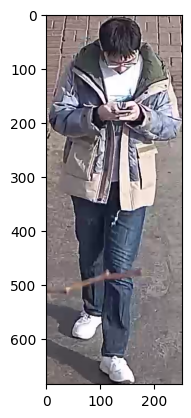

torch.Size([1, 512])

0: 384x640 1 person, 19.0ms
Speed: 2.1ms preprocess, 19.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)
tensor([[853.9364, 698.5753, 258.2364, 683.3538]], device='cuda:0')


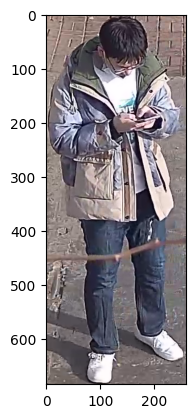

torch.Size([1, 512])

0: 384x640 1 person, 16.0ms
Speed: 3.8ms preprocess, 16.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)
tensor([[849.4642, 703.7068, 268.1521, 673.7346]], device='cuda:0')


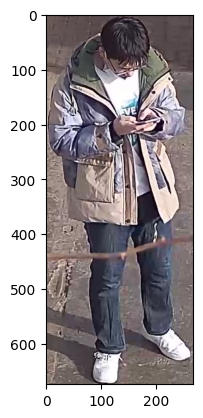

torch.Size([1, 512])

0: 384x640 1 person, 18.0ms
Speed: 2.9ms preprocess, 18.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)
tensor([[778.0502, 876.5834, 361.8837, 398.0773]], device='cuda:0')


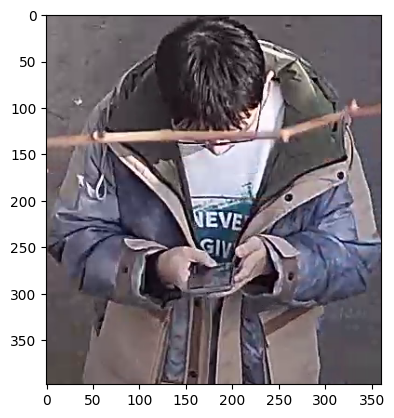

torch.Size([1, 512])

0: 384x640 (no detections), 14.1ms
Speed: 3.9ms preprocess, 14.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)
tensor([], device='cuda:0', size=(0, 4))

0: 384x640 (no detections), 13.1ms
Speed: 2.9ms preprocess, 13.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)
tensor([], device='cuda:0', size=(0, 4))

0: 384x640 (no detections), 13.0ms
Speed: 2.1ms preprocess, 13.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)
tensor([], device='cuda:0', size=(0, 4))

0: 384x640 (no detections), 15.2ms
Speed: 3.1ms preprocess, 15.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)
tensor([], device='cuda:0', size=(0, 4))

0: 384x640 (no detections), 14.2ms
Speed: 3.1ms preprocess, 14.2ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)
tensor([], device='cuda:0', size=(0, 4))

0: 384x640 (no detections), 13.2ms
Speed: 2.3ms preprocess, 13.2ms inference, 1.6ms postprocess per image at

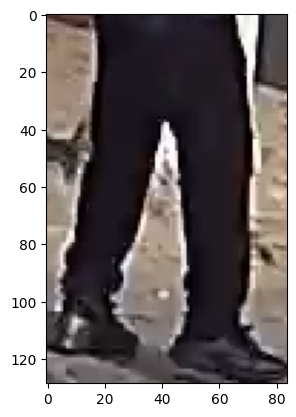

torch.Size([1, 512])

0: 384x640 (no detections), 13.6ms
Speed: 2.2ms preprocess, 13.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)
tensor([], device='cuda:0', size=(0, 4))

0: 384x640 (no detections), 16.3ms
Speed: 4.2ms preprocess, 16.3ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)
tensor([], device='cuda:0', size=(0, 4))


In [12]:
%matplotlib inline
# get frame per 2 seconds
frame_interval = int(fps * 2)
for i in range(0, int(video.get(cv2.CAP_PROP_FRAME_COUNT)), frame_interval):
    video.set(cv2.CAP_PROP_POS_FRAMES, i)
    ret, frame = video.read()
    # bgr to rgb
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    if not ret:
        break
    # detect objects in the frame, conf>0.5
    results = model(frame, classes=class_IDS, conf=0.8)
    for r in results:
        # print(r)
        print(r.boxes.xywh)
        box_num = r.boxes.cls.shape[0]
        if box_num:
            for i in range(box_num):
                _, _, w, h = r.boxes.xywh[i]
                if w <= h: 
                    # has detections and is a vertical rectangle
                    # crop
                    x1, y1, x2, y2 = r.boxes.xyxy[i]
                    crop = frame[int(y1):int(y2), int(x1):int(x2)]
                    # show the crop
                    plt.imshow(crop)
                    plt.show()
                    extract = extractor(crop)
                    print(extract.shape)
                    # print(extract)
                    index.add(extract.cpu().numpy())

                    
                    # show the frame
                    # plt.imshow(r.plot())
                    # plt.show()
    if i > 1000:
        break

In [14]:
index.ntotal

23